# Histograms plots

In this notebook, the histograms shown are:

    - Triaxiality
    - Effective strain
    - Von Mises stress
    - Principal stresses
    - Principal strains

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import math
import scipy.stats as stats
import seaborn as sns
import statistics

### Data loading:

In [2]:
uni1_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-16-094225"
uni2_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-17-162259"
uni1_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-16-095005"
uni2_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-17-162559"
uni1_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-16-095455"
uni2_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-07-17-162929"
ps1_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-15-184146"
ps2_path_A = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-17-163300"
ps1_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-16-093057"
ps2_path_B = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-17-163514"
ps1_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-16-093451"
ps2_path_C = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-07-17-163744"

In [3]:
data_uni1A = pd.read_csv(uni1_path_A+'/uniA.csv')
data_uni2A = pd.read_csv(uni2_path_A+'/uniA.csv')
data_uni1B = pd.read_csv(uni1_path_B+'/uniB.csv')
data_uni2B = pd.read_csv(uni2_path_B+'/uniB.csv')
data_uni1C = pd.read_csv(uni1_path_C+'/uniC.csv')
data_uni2C = pd.read_csv(uni2_path_C+'/uniC.csv')
data_pl1A = pd.read_csv(ps1_path_A+'/planeA.csv')
data_pl2A = pd.read_csv(ps2_path_A+'/planeA.csv')
data_pl1B = pd.read_csv(ps1_path_B+'/planeB.csv')
data_pl2B = pd.read_csv(ps2_path_B+'/planeB.csv')
data_pl1C = pd.read_csv(ps1_path_C+'/planeC.csv')
data_pl2C = pd.read_csv(ps2_path_C+'/planeC.csv')

In [4]:
for col in data_pl1A.columns:
    print(col)

1_constituent/generic/F:0
1_constituent/generic/F:1
1_constituent/generic/F:2
1_constituent/generic/F:3
1_constituent/generic/F:4
1_constituent/generic/F:5
1_constituent/generic/F:6
1_constituent/generic/F:7
1_constituent/generic/F:8
1_constituent/generic/P:0
1_constituent/generic/P:1
1_constituent/generic/P:2
1_constituent/generic/P:3
1_constituent/generic/P:4
1_constituent/generic/P:5
1_constituent/generic/P:6
1_constituent/generic/P:7
1_constituent/generic/P:8
1_constituent/generic/sigma:0
1_constituent/generic/sigma:1
1_constituent/generic/sigma:2
1_constituent/generic/sigma:3
1_constituent/generic/sigma:4
1_constituent/generic/sigma:5
1_constituent/generic/sigma:6
1_constituent/generic/sigma:7
1_constituent/generic/sigma:8
1_constituent/generic/sigma_vM
1_constituent/generic/epsilon_V^0(F):0
1_constituent/generic/epsilon_V^0(F):1
1_constituent/generic/epsilon_V^0(F):2
1_constituent/generic/epsilon_V^0(F):3
1_constituent/generic/epsilon_V^0(F):4
1_constituent/generic/epsilon_V^0(F)

## Hydrostatic stress calculation

In [5]:
sh_uni1A=[]
sh_uni2A=[]
sh_pl1A=[]
sh_pl2A=[]
for n in range(len(data_uni1A["1_constituent/generic/sigma_vM"])):
    lsh_uni1=(data_uni1A["1_constituent/generic/sigma:0"][n]+data_uni1A["1_constituent/generic/sigma:4"][n]+data_uni1A["1_constituent/generic/sigma:8"][n])/3
    lsh_uni2=(data_uni2A["1_constituent/generic/sigma:0"][n]+data_uni2A["1_constituent/generic/sigma:4"][n]+data_uni2A["1_constituent/generic/sigma:8"][n])/3
    lsh_pl1=(data_pl1A["1_constituent/generic/sigma:0"][n]+data_pl1A["1_constituent/generic/sigma:4"][n]+data_pl1A["1_constituent/generic/sigma:8"][n])/3
    lsh_pl2=(data_pl2A["1_constituent/generic/sigma:0"][n]+data_pl2A["1_constituent/generic/sigma:4"][n]+data_pl2A["1_constituent/generic/sigma:8"][n])/3
    sh_uni1A.append(lsh_uni1)
    sh_uni2A.append(lsh_uni2)
    sh_pl1A.append(lsh_pl1)
    sh_pl2A.append(lsh_pl2)

    
sh_uni1B=[]
sh_uni2B=[]
sh_pl1B=[]
sh_pl2B=[]
for n in range(len(data_uni1B["1_constituent/generic/sigma_vM"])):
    lsh_uni1=(data_uni1B["1_constituent/generic/sigma:0"][n]+data_uni1B["1_constituent/generic/sigma:4"][n]+data_uni1B["1_constituent/generic/sigma:8"][n])/3
    lsh_uni2=(data_uni2B["1_constituent/generic/sigma:0"][n]+data_uni2B["1_constituent/generic/sigma:4"][n]+data_uni2B["1_constituent/generic/sigma:8"][n])/3
    lsh_pl1=(data_pl1B["1_constituent/generic/sigma:0"][n]+data_pl1B["1_constituent/generic/sigma:4"][n]+data_pl1B["1_constituent/generic/sigma:8"][n])/3
    lsh_pl2=(data_pl2B["1_constituent/generic/sigma:0"][n]+data_pl2B["1_constituent/generic/sigma:4"][n]+data_pl2B["1_constituent/generic/sigma:8"][n])/3
    sh_uni1B.append(lsh_uni1)
    sh_uni2B.append(lsh_uni2)
    sh_pl1B.append(lsh_pl1)
    sh_pl2B.append(lsh_pl2)


sh_uni1C=[]
sh_uni2C=[]
sh_pl1C=[]
sh_pl2C=[]
for n in range(len(data_uni1C["1_constituent/generic/sigma_vM"])):
    lsh_uni1=(data_uni1C["1_constituent/generic/sigma:0"][n]+data_uni1C["1_constituent/generic/sigma:4"][n]+data_uni1C["1_constituent/generic/sigma:8"][n])/3
    lsh_uni2=(data_uni2C["1_constituent/generic/sigma:0"][n]+data_uni2C["1_constituent/generic/sigma:4"][n]+data_uni2C["1_constituent/generic/sigma:8"][n])/3
    lsh_pl1=(data_pl1C["1_constituent/generic/sigma:0"][n]+data_pl1C["1_constituent/generic/sigma:4"][n]+data_pl1C["1_constituent/generic/sigma:8"][n])/3
    lsh_pl2=(data_pl2C["1_constituent/generic/sigma:0"][n]+data_pl2C["1_constituent/generic/sigma:4"][n]+data_pl2C["1_constituent/generic/sigma:8"][n])/3
    sh_uni1C.append(lsh_uni1)
    sh_uni2C.append(lsh_uni2)
    sh_pl1C.append(lsh_pl1)
    sh_pl2C.append(lsh_pl2)
    

## Max values triaxiality

In [6]:
max_uni1A=max(sh_uni1A/data_uni1A["1_constituent/generic/sigma_vM"])
max_uni2A=max(sh_uni2A/data_uni2A["1_constituent/generic/sigma_vM"])
max_pl1A=max(sh_pl1A/data_pl1A["1_constituent/generic/sigma_vM"])
max_pl2A=max(sh_pl2A/data_pl2A["1_constituent/generic/sigma_vM"])
max_uni1B=max(sh_uni1B/data_uni1B["1_constituent/generic/sigma_vM"])
max_uni2B=max(sh_uni2B/data_uni2B["1_constituent/generic/sigma_vM"])
max_pl1B=max(sh_pl1B/data_pl1B["1_constituent/generic/sigma_vM"])
max_pl2B=max(sh_pl2B/data_pl2B["1_constituent/generic/sigma_vM"])
max_uni1C=max(sh_uni1C/data_uni1C["1_constituent/generic/sigma_vM"])
max_uni2C=max(sh_uni2C/data_uni2C["1_constituent/generic/sigma_vM"])
max_pl1C=max(sh_pl1C/data_pl1C["1_constituent/generic/sigma_vM"])
max_pl2C=max(sh_pl2C/data_pl2C["1_constituent/generic/sigma_vM"])
print('Alloy A: ')
print('Max triaxiality_uni1: ',round(max_uni1A,2),'         Max triaxiality_PlaneStrain1: ',round(max_pl1A,2) )
print('Max triaxiality_uni2: ',round(max_uni2A,2),'         Max triaxiality_PlaneStrain2: ',round(max_pl2A,2) )
print(' ')
print('Alloy B: ')
print('Max triaxiality_uni1: ',round(max_uni1B,2),'         Max triaxiality_PlaneStrain1: ',round(max_pl1B,2))
print('Max triaxiality_uni2: ',round(max_uni2B,2),'         Max triaxiality_PlaneStrain2: ',round(max_pl2B,2))
print(' ')
print('Alloy C: ')
print('Max triaxiality_uni1: ',round(max_uni1C,2),'         Max triaxiality_PlaneStrain1: ',round(max_pl1C,2))
print('Max triaxiality_uni2: ',round(max_uni2C,2),'         Max triaxiality_PlaneStrain2: ',round(max_pl2C,2))
print(' ')

Alloy A: 
Max triaxiality_uni1:  1.89          Max triaxiality_PlaneStrain1:  2.42
Max triaxiality_uni2:  1.84          Max triaxiality_PlaneStrain2:  2.13
 
Alloy B: 
Max triaxiality_uni1:  1.92          Max triaxiality_PlaneStrain1:  2.75
Max triaxiality_uni2:  1.97          Max triaxiality_PlaneStrain2:  2.35
 
Alloy C: 
Max triaxiality_uni1:  1.97          Max triaxiality_PlaneStrain1:  2.3
Max triaxiality_uni2:  1.95          Max triaxiality_PlaneStrain2:  2.53
 


## Percentil 95 triaxiality

In [7]:
quant_95_uni1A=np.percentile(sh_uni1A/data_uni1A["1_constituent/generic/sigma_vM"],95)
quant_95_uni2A=np.percentile(sh_uni2A/data_uni2A["1_constituent/generic/sigma_vM"],95)
quant_95_pl1A=np.percentile(sh_pl1A/data_pl1A["1_constituent/generic/sigma_vM"],95)
quant_95_pl2A=np.percentile(sh_pl2A/data_pl2A["1_constituent/generic/sigma_vM"],95)
quant_95_uni1B=np.percentile(sh_uni1B/data_uni1B["1_constituent/generic/sigma_vM"],95)
quant_95_uni2B=np.percentile(sh_uni2B/data_uni2B["1_constituent/generic/sigma_vM"],95)
quant_95_pl1B=np.percentile(sh_pl1B/data_pl1B["1_constituent/generic/sigma_vM"],95)
quant_95_pl2B=np.percentile(sh_pl2B/data_pl2B["1_constituent/generic/sigma_vM"],95)
quant_95_uni1C=np.percentile(sh_uni1C/data_uni1C["1_constituent/generic/sigma_vM"],95)
quant_95_uni2C=np.percentile(sh_uni2C/data_uni2C["1_constituent/generic/sigma_vM"],95)
quant_95_pl1C=np.percentile(sh_pl1C/data_pl1C["1_constituent/generic/sigma_vM"],95)
quant_95_pl2C=np.percentile(sh_pl2C/data_pl2C["1_constituent/generic/sigma_vM"],95)
print('Alloy A: ')
print('95th percentile_uni1: ',round(quant_95_uni1A,2), '       95th percentile_plane_strain1: ',round(quant_95_pl1A,2))
print('95th percentile_uni2: ',round(quant_95_uni2A,2), '       95th percentile_plane_strain2: ',round(quant_95_pl2A,2))
print(' ')
print('Alloy B: ')
print('95th percentile_uni1: ',round(quant_95_uni1B,2), '       95th percentile_plane_strain1: ',round(quant_95_pl1B,2))
print('95th percentile_uni2: ',round(quant_95_uni2B,2), '       95th percentile_plane_strain2: ',round(quant_95_pl2B,2))
print(' ')
print('Alloy C: ')
print('95th percentile_uni1: ',round(quant_95_uni1C,2), '       95th percentile_plane_strain1: ',round(quant_95_pl1C,2))
print('95th percentile_uni2: ',round(quant_95_uni2C,2), '       95th percentile_plane_strain2: ',round(quant_95_pl2C,2))
print(' ')

Alloy A: 
95th percentile_uni1:  0.62        95th percentile_plane_strain1:  0.92
95th percentile_uni2:  0.62        95th percentile_plane_strain2:  0.89
 
Alloy B: 
95th percentile_uni1:  0.64        95th percentile_plane_strain1:  0.9
95th percentile_uni2:  0.63        95th percentile_plane_strain2:  0.91
 
Alloy C: 
95th percentile_uni1:  0.63        95th percentile_plane_strain1:  0.91
95th percentile_uni2:  0.62        95th percentile_plane_strain2:  0.9
 


## Triaxiality histograms

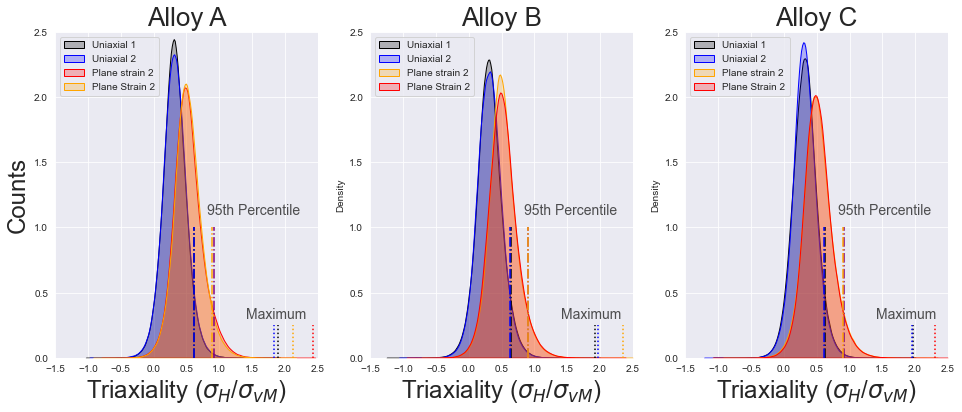

In [8]:
plt.rcParams['figure.figsize'] = 16, 6
sns.set_style('darkgrid')

plt.subplot(1,3,1);
plt.title('Alloy A', fontsize=26)
sns.kdeplot(sh_uni1A/data_uni1A["1_constituent/generic/sigma_vM"], color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(sh_uni2A/data_uni2A["1_constituent/generic/sigma_vM"], color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(sh_pl1A/data_pl1A["1_constituent/generic/sigma_vM"], color='red',shade=True, label='Plane strain 2')
sns.kdeplot(sh_pl2A/data_pl2A["1_constituent/generic/sigma_vM"], color='orange', shade=True, label='Plane Strain 2')

plt.axvline(quant_95_uni1A, ymax=0.4, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2A, ymax=0.4, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1A, ymax=0.4, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2A, ymax=0.4, linestyle = "-.", color='orange')
plt.axvline(max(sh_uni1A/data_uni1A["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='black')
plt.axvline(max(sh_uni2A/data_uni2A["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max(sh_pl1A/data_pl1A["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='red')
plt.axvline(max(sh_pl2A/data_pl2A["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='orange')

plt.text(quant_95_uni1A+0.2, 1.1, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(1.4, 0.3, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper left')
plt.xlabel('Triaxiality ($\u03C3_{H}$/$\u03C3_{vM}$)',size=24)    
plt.ylabel('Counts',size=24)
plt.xlim([-1.5, 2.5])
plt.ylim([0, 2.5])

plt.subplot(1,3,2);
plt.title('Alloy B', fontsize=26)
sns.kdeplot(sh_uni1B/data_uni1B["1_constituent/generic/sigma_vM"], color='black',shade=True, label='Uniaxial 1')
sns.kdeplot(sh_uni2B/data_uni2B["1_constituent/generic/sigma_vM"], color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(sh_pl1B/data_pl1B["1_constituent/generic/sigma_vM"], color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(sh_pl2B/data_pl2B["1_constituent/generic/sigma_vM"], color='red', shade=True, label='Plane Strain 2')

plt.axvline(quant_95_uni1B, ymax=0.4, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2B, ymax=0.4, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1B, ymax=0.4, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2B, ymax=0.4, linestyle = "-.", color='orange')
plt.axvline(max(sh_uni1B/data_uni1B["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='black')
plt.axvline(max(sh_uni2B/data_uni2B["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max(sh_pl1B/data_pl1B["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='red')
plt.axvline(max(sh_pl2B/data_pl2B["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='orange')

plt.text(quant_95_uni1B+0.2, 1.1, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(1.4, 0.3, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper left')
plt.xlabel('Triaxiality ($\u03C3_{H}$/$\u03C3_{vM}$)',size=24)
plt.xlim([-1.5, 2.5])
plt.ylim([0, 2.5])

plt.subplot(1,3,3);
plt.title('Alloy C', fontsize=26)
sns.kdeplot(sh_uni1C/data_uni1C["1_constituent/generic/sigma_vM"], color='black',shade=True, label='Uniaxial 1')
sns.kdeplot(sh_uni2C/data_uni2C["1_constituent/generic/sigma_vM"], color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(sh_pl1C/data_pl1C["1_constituent/generic/sigma_vM"], color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(sh_pl2C/data_pl2C["1_constituent/generic/sigma_vM"], color='red', shade=True, label='Plane Strain 2')

plt.axvline(quant_95_uni1C, ymax=0.4, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2C, ymax=0.4, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1C, ymax=0.4, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2C, ymax=0.4, linestyle = "-.", color='orange')
plt.axvline(max(sh_uni1C/data_uni1C["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='black')
plt.axvline(max(sh_uni2C/data_uni2C["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max(sh_pl1C/data_pl1C["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='red')
plt.axvline(max(sh_pl2C/data_pl2C["1_constituent/generic/sigma_vM"]), ymax=0.1, linestyle = ":", color='orange')

plt.text(quant_95_uni1C+0.2, 1.1, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(1.4, 0.3, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper left')
plt.xlabel('Triaxiality ($\u03C3_{H}$/$\u03C3_{vM}$)',size=24)
plt.xlim([-1.5, 2.5])
plt.ylim([0, 2.5])

plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Results\Pictures\triaxiality.png")

## Max values normalised effective strain

In [9]:
# Mean values
mean_uni1A=statistics.mean(data_uni1A['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_uni2A=statistics.mean(data_uni2A['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_pl1A=statistics.mean(data_pl1A['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_pl2A=statistics.mean(data_pl2A['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_uni1B=statistics.mean(data_uni1B['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_uni2B=statistics.mean(data_uni2B['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_pl1B=statistics.mean(data_pl1B['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_pl2B=statistics.mean(data_pl2B['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_uni1C=statistics.mean(data_uni1C['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_uni2C=statistics.mean(data_uni2C['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_pl1C=statistics.mean(data_pl1C['1_constituent/generic/epsilon_V^0(F)_vM'])
mean_pl2C=statistics.mean(data_pl2C['1_constituent/generic/epsilon_V^0(F)_vM'])

# Normalised strain
ee_uni1A=data_uni1A["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_uni1A
ee_uni2A=data_uni2A["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_uni2A
ee_pl1A=data_pl1A["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_pl1A
ee_pl2A=data_pl2A["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_pl2A
ee_uni1B=data_uni1B["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_uni1B
ee_uni2B=data_uni2B["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_uni2B
ee_pl1B=data_pl1B["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_pl1A
ee_pl2B=data_pl2B["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_pl2B
ee_uni1C=data_uni1C["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_uni1C
ee_uni2C=data_uni2C["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_uni2C
ee_pl1C=data_pl1C["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_pl1C
ee_pl2C=data_pl2C["1_constituent/generic/epsilon_V^0(F)_vM"]/mean_pl2C

# Max normalised strain
max_uni1A=max(ee_uni1A)
max_uni2A=max(ee_uni2A)
max_pl1A=max(ee_pl1A)
max_pl2A=max(ee_pl2A)
max_uni1B=max(ee_uni1B)
max_uni2B=max(ee_uni2B)
max_pl1B=max(ee_pl1B)
max_pl2B=max(ee_pl2B)
max_uni1C=max(ee_uni1C)
max_uni2C=max(ee_uni2C)
max_pl1C=max(ee_pl1C)
max_pl2C=max(ee_pl2C)
print('Alloy A: ')
print('Normalised strain_uni1: ',round(max_uni1A,2),'         Normalised strain_PlaneStrain1: ',round(max_pl1A,2) )
print('Normalised strain_uni2: ',round(max_uni2A,2),'         Normalised strain_PlaneStrain1: ',round(max_pl2A,2) )
print(' ')
print('Alloy B: ')
print('Normalised strain_uni1: ',round(max_uni1B,2),'         Normalised strain_PlaneStrain1: ',round(max_pl1B,2))
print('Normalised strain_uni2: ',round(max_uni2B,2),'         Normalised strain_PlaneStrain2: ',round(max_pl2B,2))
print(' ')
print('Alloy C: ')
print('Normalised strain_uni1: ',round(max_uni1C,2),'         Normalised strain_PlaneStrain1: ',round(max_pl1C,2))
print('Normalised strain_uni2: ',round(max_uni2C,2),'         Normalised strain_PlaneStrain2:: ',round(max_pl2C,2))
print(' ')

Alloy A: 
Normalised strain_uni1:  2.73          Normalised strain_PlaneStrain1:  3.37
Normalised strain_uni2:  3.0          Normalised strain_PlaneStrain1:  3.13
 
Alloy B: 
Normalised strain_uni1:  3.3          Normalised strain_PlaneStrain1:  3.02
Normalised strain_uni2:  3.01          Normalised strain_PlaneStrain2:  2.82
 
Alloy C: 
Normalised strain_uni1:  2.78          Normalised strain_PlaneStrain1:  3.07
Normalised strain_uni2:  2.67          Normalised strain_PlaneStrain2::  3.0
 


## 90th percentile normalised strain

In [10]:
quant_95_uni1A=np.percentile(ee_uni1A,95)
quant_95_uni2A=np.percentile(ee_uni2A,95)
quant_95_pl1A=np.percentile(ee_pl1A,95)
quant_95_pl2A=np.percentile(ee_pl2A,95)
quant_95_uni1B=np.percentile(ee_uni1B,95)
quant_95_uni2B=np.percentile(ee_uni2B,95)
quant_95_pl1B=np.percentile(ee_pl1B,95)
quant_95_pl2B=np.percentile(ee_pl2B,95)
quant_95_uni1C=np.percentile(ee_uni1C,95)
quant_95_uni2C=np.percentile(ee_uni2C,95)
quant_95_pl1C=np.percentile(ee_pl1C,95)
quant_95_pl2C=np.percentile(ee_pl2C,95)
print('Alloy A: ')
print('Normalised strain_uni1: ',round(quant_95_uni1A,2), '       Normalised Plane_strain1: ',round(quant_95_pl1A,2))
print('Normalised strain_uni2: ',round(quant_95_uni2A,2), '       Normalised Plane_strain2: ',round(quant_95_pl2A,2))
print(' ')
print('Alloy B: ')
print('Normalised strain_uni1: ',round(quant_95_uni1B,2), '       Normalised Plane_strain1: ',round(quant_95_pl1B,2))
print('Normalised strain_uni2: ',round(quant_95_uni2B,2), '       Normalised Plane_strain2: ',round(quant_95_pl2B,2))
print(' ')
print('Alloy C: ')
print('Normalised strain_uni1: ',round(quant_95_uni1C,2), '       Normalised Plane_strain1: ',round(quant_95_pl1C,2))
print('Normalised strain_uni2: ',round(quant_95_uni2C,2), '       Normalised Plane_strain2: ',round(quant_95_pl2C,2))
print(' ')

Alloy A: 
Normalised strain_uni1:  1.41        Normalised Plane_strain1:  1.45
Normalised strain_uni2:  1.42        Normalised Plane_strain2:  1.45
 
Alloy B: 
Normalised strain_uni1:  1.42        Normalised Plane_strain1:  1.45
Normalised strain_uni2:  1.42        Normalised Plane_strain2:  1.44
 
Alloy C: 
Normalised strain_uni1:  1.43        Normalised Plane_strain1:  1.44
Normalised strain_uni2:  1.41        Normalised Plane_strain2:  1.45
 


## Normalised effective strain histograms

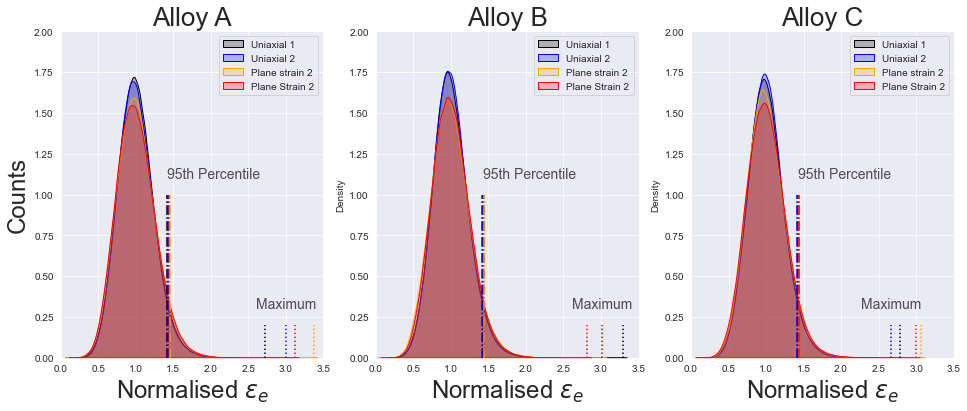

In [11]:
plt.rcParams['figure.figsize'] = 16, 6
sns.set_style('darkgrid')

plt.subplot(1,3,1);
plt.title('Alloy A', fontsize=26)
sns.kdeplot(ee_uni1A, color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(ee_uni2A, color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(ee_pl1A, color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(ee_pl2A, color='red', shade=True, label='Plane Strain 2')
plt.axvline(quant_95_uni1A, ymax=0.5, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2A, ymax=0.5, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1A, ymax=0.5, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2A, ymax=0.5, linestyle = "-.", color='orange')
plt.axvline(max_uni1A, ymax=0.1, linestyle = ":", color='black')
plt.axvline(max_uni2A, ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max_pl1A, ymax=0.1, linestyle = ":", color='orange')
plt.axvline(max_pl2A, ymax=0.1, linestyle = ":", color='red')

plt.text(quant_95_uni1A, 1.1, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(max_uni2A-0.4, 0.3, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Normalised $\u03B5_{e}$',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([0, 3.5])
plt.ylim([0, 2])

plt.subplot(1,3,2);
plt.title('Alloy B', fontsize=26)
sns.kdeplot(ee_uni1B, color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(ee_uni2B, color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(ee_pl1B, color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(ee_pl2B, color='red', shade=True, label='Plane Strain 2')
plt.axvline(quant_95_uni1B, ymax=0.5, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2B, ymax=0.5, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1B, ymax=0.5, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2B, ymax=0.5, linestyle = "-.", color='orange')
plt.axvline(max_uni1B, ymax=0.1, linestyle = ":", color='black')
plt.axvline(max_uni2B, ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max_pl1B, ymax=0.1, linestyle = ":", color='orange')
plt.axvline(max_pl2B, ymax=0.1, linestyle = ":", color='red')

plt.text(quant_95_uni1B, 1.1, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(max_uni2B-0.4, 0.3, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Normalised $\u03B5_{e}$',size=24)
#plt.ylabel('Counts',size=24)
plt.xlim([0, 3.5])
plt.ylim([0, 2])

plt.subplot(1,3,3);
plt.title('Alloy C', fontsize=26)
sns.kdeplot(ee_uni1C, color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(ee_uni2C, color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(ee_pl1C, color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(ee_pl2C, color='red', shade=True, label='Plane Strain 2')
plt.axvline(quant_95_uni1C, ymax=0.5, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2C, ymax=0.5, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1C, ymax=0.5, linestyle = "-.", color='orange')
plt.axvline(quant_95_pl2C, ymax=0.5, linestyle = "-.", color='red')
plt.axvline(max_uni1C, ymax=0.1, linestyle = ":", color='black')
plt.axvline(max_uni2C, ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max_pl1C, ymax=0.1, linestyle = ":", color='orange')
plt.axvline(max_pl2C, ymax=0.1, linestyle = ":", color='red')

plt.text(quant_95_uni1C, 1.1, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(max_uni2C-0.4, 0.3, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Normalised $\u03B5_{e}$',size=24)
#plt.ylabel('Counts',size=24)
plt.xlim([0, 3.5])
plt.ylim([0, 2])

plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Results\Pictures\normalised_strains.png")

## Normalised Von Mises stress

In [12]:
norm_uni1A=data_uni1A['1_constituent/generic/sigma_vM']/statistics.mean(data_uni1A['1_constituent/generic/sigma_vM'])
norm_uni2A=data_uni2A['1_constituent/generic/sigma_vM']/statistics.mean(data_uni2A['1_constituent/generic/sigma_vM'])
norm_pl1A=data_pl1A['1_constituent/generic/sigma_vM']/statistics.mean(data_pl1A['1_constituent/generic/sigma_vM'])
norm_pl2A=data_pl2A['1_constituent/generic/sigma_vM']/statistics.mean(data_pl2A['1_constituent/generic/sigma_vM'])

norm_uni1B=data_uni1B['1_constituent/generic/sigma_vM']/statistics.mean(data_uni1B['1_constituent/generic/sigma_vM'])
norm_uni2B=data_uni2B['1_constituent/generic/sigma_vM']/statistics.mean(data_uni2B['1_constituent/generic/sigma_vM'])
norm_pl1B=data_pl1B['1_constituent/generic/sigma_vM']/statistics.mean(data_pl1B['1_constituent/generic/sigma_vM'])
norm_pl2B=data_pl2B['1_constituent/generic/sigma_vM']/statistics.mean(data_pl2B['1_constituent/generic/sigma_vM'])

norm_uni1C=data_uni1C['1_constituent/generic/sigma_vM']/statistics.mean(data_uni1C['1_constituent/generic/sigma_vM'])
norm_uni2C=data_uni2C['1_constituent/generic/sigma_vM']/statistics.mean(data_uni2C['1_constituent/generic/sigma_vM'])
norm_pl1C=data_pl1C['1_constituent/generic/sigma_vM']/statistics.mean(data_pl1C['1_constituent/generic/sigma_vM'])
norm_pl2C=data_pl2C['1_constituent/generic/sigma_vM']/statistics.mean(data_pl2C['1_constituent/generic/sigma_vM'])

## Maximum normalised stress

In [13]:
max_uni1A=max(norm_uni1A)
max_uni2A=max(norm_uni2A)
max_pl1A=max(norm_pl1A)
max_pl2A=max(norm_pl2A)
max_uni1B=max(norm_uni1B)
max_uni2B=max(norm_uni2B)
max_pl1B=max(norm_pl1B)
max_pl2B=max(norm_pl2B)
max_uni1C=max(norm_uni1C)
max_uni2C=max(norm_uni2C)
max_pl1C=max(norm_pl1C)
max_pl2C=max(norm_pl2C)
print('Alloy A: ')
print('Normalised strain_uni1: ',round(max_uni1A,2),'         Normalised strain_PlaneStrain1: ',round(max_pl1A,2) )
print('Normalised strain_uni2: ',round(max_uni2A,2),'         Normalised strain_PlaneStrain1: ',round(max_pl2A,2) )
print(' ')
print('Alloy B: ')
print('Normalised strain_uni1: ',round(max_uni1B,2),'         Normalised strain_PlaneStrain1: ',round(max_pl1B,2))
print('Normalised strain_uni2: ',round(max_uni2B,2),'         Normalised strain_PlaneStrain2: ',round(max_pl2B,2))
print(' ')
print('Alloy C: ')
print('Normalised strain_uni1: ',round(max_uni1C,2),'         Normalised strain_PlaneStrain1: ',round(max_pl1C,2))
print('Normalised strain_uni2: ',round(max_uni2C,2),'         Normalised strain_PlaneStrain2:: ',round(max_pl2C,2))
print(' ')

Alloy A: 
Normalised strain_uni1:  1.9          Normalised strain_PlaneStrain1:  1.9
Normalised strain_uni2:  1.86          Normalised strain_PlaneStrain1:  1.94
 
Alloy B: 
Normalised strain_uni1:  1.84          Normalised strain_PlaneStrain1:  1.96
Normalised strain_uni2:  1.99          Normalised strain_PlaneStrain2:  1.89
 
Alloy C: 
Normalised strain_uni1:  1.81          Normalised strain_PlaneStrain1:  1.93
Normalised strain_uni2:  1.8          Normalised strain_PlaneStrain2::  1.95
 


## 95th percentile normalised stress

In [14]:
quant_95_uni1A=np.percentile(norm_uni1A,95)
quant_95_uni2A=np.percentile(norm_uni2A,95)
quant_95_pl1A=np.percentile(norm_pl1A,95)
quant_95_pl2A=np.percentile(norm_pl2A,95)
quant_95_uni1B=np.percentile(norm_uni1B,95)
quant_95_uni2B=np.percentile(norm_uni2B,95)
quant_95_pl1B=np.percentile(norm_pl1B,95)
quant_95_pl2B=np.percentile(norm_pl2B,95)
quant_95_uni1C=np.percentile(norm_uni1C,95)
quant_95_uni2C=np.percentile(norm_uni2C,95)
quant_95_pl1C=np.percentile(norm_pl1C,95)
quant_95_pl2C=np.percentile(norm_pl2C,95)
print('Alloy A: ')
print('Normalised stress_uni1: ',round(quant_95_uni1A, 2),'       Normalised Plane_stress1: ',round(quant_95_pl1A, 2))
print('Normalised stress_uni2: ',round(quant_95_uni2A, 2),'       Normalised Plane_stress2: ',round(quant_95_pl2A, 2))
print(' ')
print('Alloy B: ')
print('Normalised stress_uni1: ',round(quant_95_uni1B, 2), '       Normalised Plane_stress1: ',round(quant_95_pl1B, 2))
print('Normalised stress_uni2: ',round(quant_95_uni2B, 2), '       Normalised Plane_stress2: ',round(quant_95_pl2B, 2))
print(' ')
print('Alloy C: ')
print('Normalised stress_uni1: ',round(quant_95_uni1C, 2), '       Normalised Plane_stress1: ',round(quant_95_pl1C, 2))
print('Normalised stress_uni2: ',round(quant_95_uni2C, 2), '       Normalised Plane_stress2: ',round(quant_95_pl2C, 2))
print(' ')

Alloy A: 
Normalised stress_uni1:  1.32        Normalised Plane_stress1:  1.32
Normalised stress_uni2:  1.32        Normalised Plane_stress2:  1.3
 
Alloy B: 
Normalised stress_uni1:  1.3        Normalised Plane_stress1:  1.32
Normalised stress_uni2:  1.31        Normalised Plane_stress2:  1.31
 
Alloy C: 
Normalised stress_uni1:  1.31        Normalised Plane_stress1:  1.32
Normalised stress_uni2:  1.31        Normalised Plane_stress2:  1.31
 


### Normalised Von Mises stress histograms

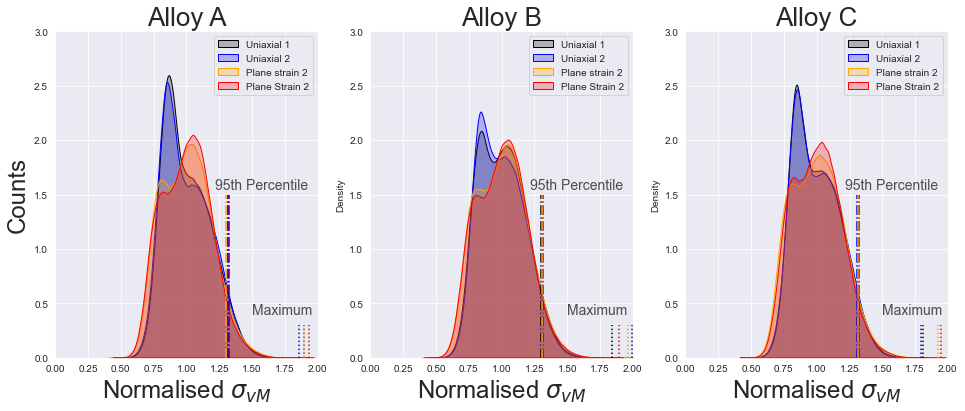

In [15]:
plt.rcParams['figure.figsize'] = 16, 6
sns.set_style('darkgrid')

plt.subplot(1,3,1);
plt.title('Alloy A', fontsize=26)
sns.kdeplot(norm_uni1A,  color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(norm_uni2A, color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(norm_pl1A, color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(norm_pl2A, color='red', shade=True, label='Plane Strain 2')
plt.axvline(quant_95_uni1A, ymax=0.5, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2A, ymax=0.5, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1A, ymax=0.5, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2A, ymax=0.5, linestyle = "-.", color='orange')
plt.axvline(max_uni1A, ymax=0.1, linestyle = ":", color='black')
plt.axvline(max_uni2A, ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max_pl1A, ymax=0.1, linestyle = ":", color='orange')
plt.axvline(max_pl2A, ymax=0.1, linestyle = ":", color='red')

plt.text(quant_95_uni1A-0.1, 1.55, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(max_uni1A-0.4, 0.4, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Normalised $\u03C3_{vM}$',size=24)    
plt.ylabel('Counts',size=24)
plt.xlim([0, 2])
plt.ylim([0, 3])

plt.subplot(1,3,2);
plt.title('Alloy B', fontsize=26)
sns.kdeplot(norm_uni1B,  color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(norm_uni2B, color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(norm_pl1B, color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(norm_pl2B, color='red', shade=True, label='Plane Strain 2')
plt.axvline(quant_95_uni1B, ymax=0.5, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2B, ymax=0.5, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1B, ymax=0.5, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2B, ymax=0.5, linestyle = "-.", color='orange')
plt.axvline(max_uni1B, ymax=0.1, linestyle = ":", color='black')
plt.axvline(max_uni2B, ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max_pl1B, ymax=0.1, linestyle = ":", color='orange')
plt.axvline(max_pl2B, ymax=0.1, linestyle = ":", color='red')

plt.text(quant_95_uni1A-0.1, 1.55, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(max_uni1A-0.4, 0.4, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Normalised $\u03C3_{vM}$',size=24)
#plt.ylabel('Counts',size=24)
plt.xlim([0, 2])
plt.ylim([0, 3])

plt.subplot(1,3,3);
plt.title('Alloy C', fontsize=26)
sns.kdeplot(norm_uni1C,  color='black', shade=True, label='Uniaxial 1')
sns.kdeplot(norm_uni2C, color='blue', shade=True, label='Uniaxial 2')
sns.kdeplot(norm_pl1C, color='orange',shade=True, label='Plane strain 2')
sns.kdeplot(norm_pl2C, color='red', shade=True, label='Plane Strain 2')
plt.axvline(quant_95_uni1C, ymax=0.5, linestyle = "-.", color='black')
plt.axvline(quant_95_uni2C, ymax=0.5, linestyle = "-.", color='blue')
plt.axvline(quant_95_pl1C, ymax=0.5, linestyle = "-.", color='purple')
plt.axvline(quant_95_pl2C, ymax=0.5, linestyle = "-.", color='orange')
plt.axvline(max_uni1C, ymax=0.1, linestyle = ":", color='black')
plt.axvline(max_uni2C, ymax=0.1, linestyle = ":", color='blue')
plt.axvline(max_pl1C, ymax=0.1, linestyle = ":", color='orange')
plt.axvline(max_pl2C, ymax=0.1, linestyle = ":", color='red')

plt.text(quant_95_uni1A-0.1, 1.55, "95th Percentile", size = 10, alpha =.8, fontsize=14)
plt.text(max_uni1A-0.4, 0.4, "Maximum", size = 10, alpha =.8, fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Normalised $\u03C3_{vM}$',size=24)
#plt.ylabel('Counts',size=24)
plt.xlim([0, 2])
plt.ylim([0, 3])

plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Results\Pictures\normalised_stress.png")

## Princial stresses 

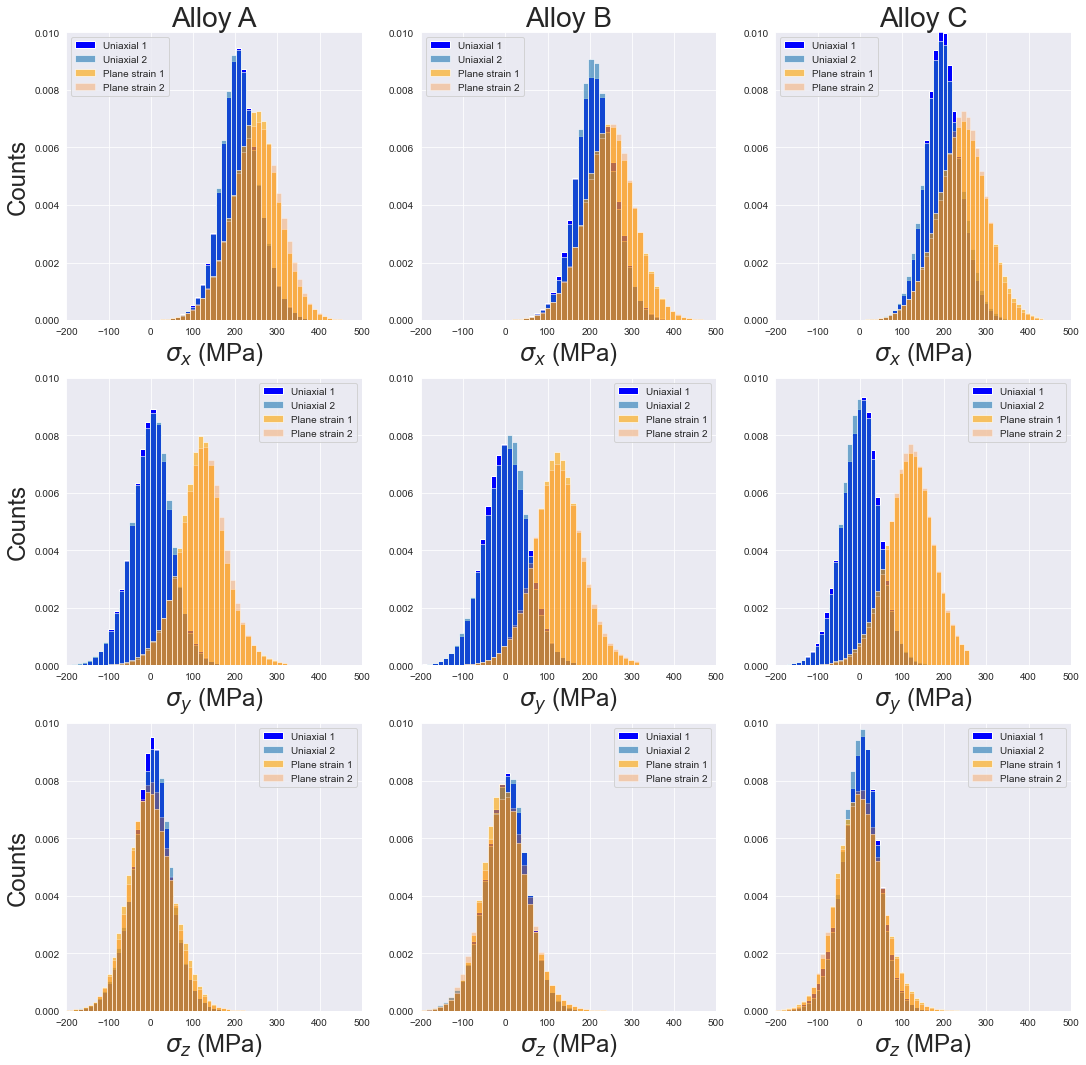

In [16]:
plt.rcParams['figure.figsize'] = 18, 18

plt.subplot(3,3,1);
plt.title('Alloy A', fontsize=28)
_, bins, _ = plt.hist(data_uni1A["1_constituent/generic/sigma:0"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2A["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1A["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2A["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper left')
plt.xlabel('$\u03C3_{x}$ (MPa)',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,2);
plt.title('Alloy B', fontsize=28)
_, bins, _ = plt.hist(data_uni1B["1_constituent/generic/sigma:0"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2B["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1B["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2B["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper left')
plt.xlabel('$\u03C3_{x}$ (MPa)',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,3);
plt.title('Alloy C', fontsize=28)
_, bins, _ = plt.hist(data_uni1C["1_constituent/generic/sigma:0"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2C["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1C["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2C["1_constituent/generic/sigma:0"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper left')
plt.xlabel('$\u03C3_{x}$ (MPa)',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,4);

_, bins, _ = plt.hist(data_uni1A["1_constituent/generic/sigma:4"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2A["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1A["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2A["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03C3_{y}$ (MPa)',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,5);

_, bins, _ = plt.hist(data_uni1B["1_constituent/generic/sigma:4"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2B["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1B["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2B["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03C3_{y}$ (MPa)',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,6);

_, bins, _ = plt.hist(data_uni1C["1_constituent/generic/sigma:4"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2C["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1C["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2C["1_constituent/generic/sigma:4"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03C3_{y}$ (MPa)',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,7);

_, bins, _ = plt.hist(data_uni1A["1_constituent/generic/sigma:8"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2A["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1A["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2A["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03C3_{z}$ (MPa)',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,8);

_, bins, _ = plt.hist(data_uni1B["1_constituent/generic/sigma:8"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2B["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1B["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2B["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03C3_{z}$ (MPa)',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])

plt.subplot(3,3,9);

_, bins, _ = plt.hist(data_uni1C["1_constituent/generic/sigma:8"]/1e6, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2C["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1C["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2C["1_constituent/generic/sigma:8"]/1e6, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03C3_{z}$ (MPa)',size=24)
plt.xlim([-200,500])
plt.ylim([0, 0.01])


plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\principalstress.png")

## Principal strains

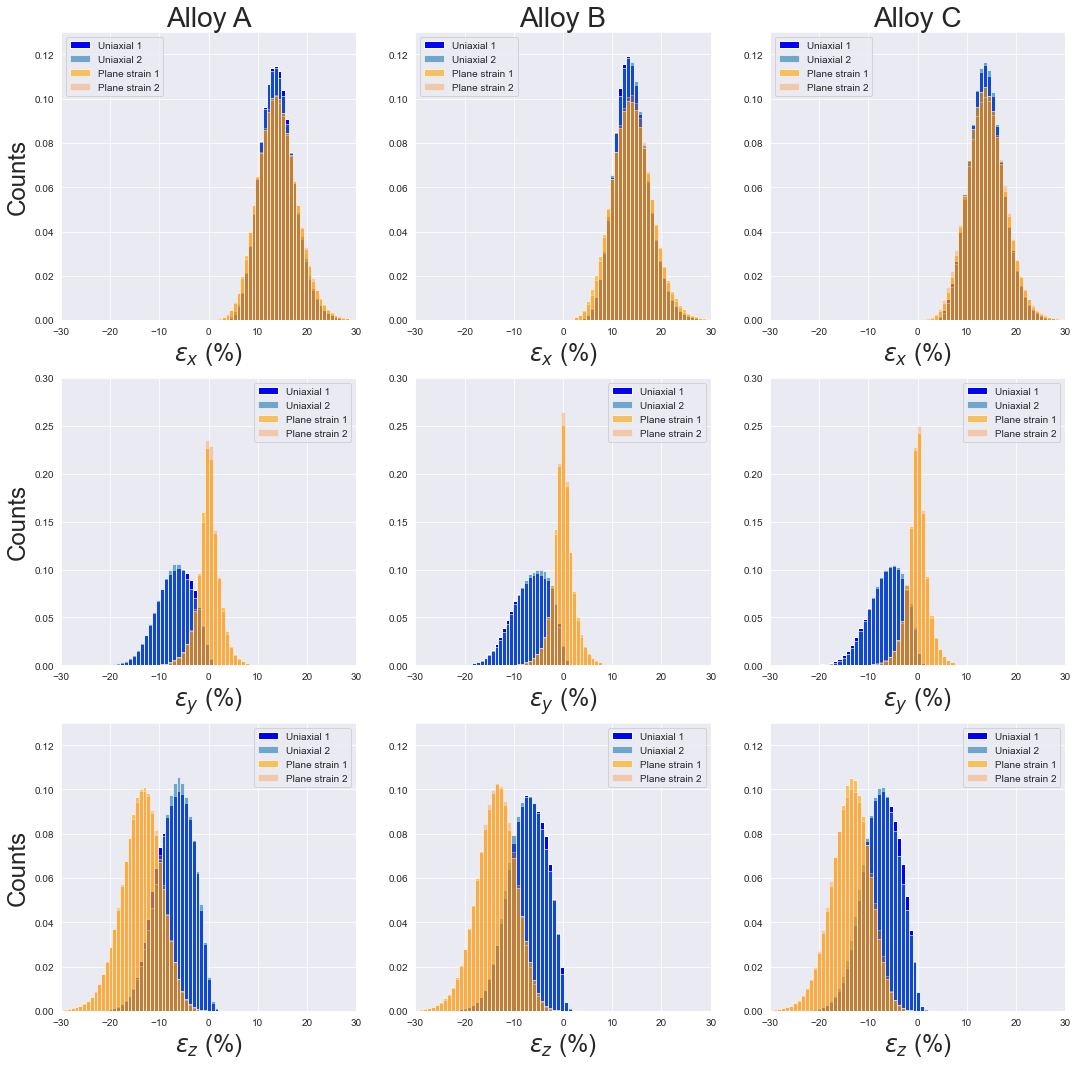

In [17]:
plt.rcParams['figure.figsize'] = 18, 18

plt.subplot(3,3,1);
plt.title('Alloy A', fontsize=28)
_, bins, _ = plt.hist(data_uni1A["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2A["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1A["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2A["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper left')
plt.xlabel('$\u03B5_{x}$ (%)',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.13])

plt.subplot(3,3,2);
plt.title('Alloy B', fontsize=28)
_, bins, _ = plt.hist(data_uni1B["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2B["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1B["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2B["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper left')
plt.xlabel('$\u03B5_{x}$ (%)',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.13])

plt.subplot(3,3,3);
plt.title('Alloy C', fontsize=28)
_, bins, _ = plt.hist(data_uni1C["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2C["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1C["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2C["1_constituent/generic/epsilon_V^0(F):0"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper left')
plt.xlabel('$\u03B5_{x}$ (%)',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.13])

plt.subplot(3,3,4);

_, bins, _ = plt.hist(data_uni1A["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2A["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1A["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2A["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03B5_{y}$ (%)',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.3])


plt.subplot(3,3,5);

_, bins, _ = plt.hist(data_uni1B["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2B["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1B["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2B["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03B5_{y}$ (%)',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.3])

plt.subplot(3,3,6);

_, bins, _ = plt.hist(data_uni1C["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2C["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1C["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2C["1_constituent/generic/epsilon_V^0(F):4"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03B5_{y}$ (%)',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.3])

plt.subplot(3,3,7);

_, bins, _ = plt.hist(data_uni1A["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2A["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1A["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2A["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03B5_{z}$ (%)',size=24)
plt.ylabel('Counts',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.13])

plt.subplot(3,3,8);

_, bins, _ = plt.hist(data_uni1B["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2B["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1B["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2B["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03B5_{z}$ (%)',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.13])

plt.subplot(3,3,9);

_, bins, _ = plt.hist(data_uni1C["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=50, label='Uniaxial 1', color='blue',density=True)    
_, bins, _ = plt.hist(data_uni2C["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.6, label='Uniaxial 2',density=True)
_, bins, _ = plt.hist(data_pl1C["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.6, label='Plane strain 1', color='orange',density=True)
_, bins, _ = plt.hist(data_pl2C["1_constituent/generic/epsilon_V^0(F):8"]*100, bins=bins, alpha=0.3, label='Plane strain 2',density=True)

plt.legend(loc='upper right')
plt.xlabel('$\u03B5_{z}$ (%)',size=24)
plt.xlim([-30,30])
plt.ylim([0, 0.13])


plt.savefig(r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\principalstrains.png")